In [32]:
! pip install ogip
from astropy.io import fits
import ogip

Defaulting to user installation because normal site-packages is not writeable


In [33]:
# oda:version "v1.1"

In [34]:
rmf = fits.open("spi/rmf_GRB2rGRB2022sgrsp10aCVGRB_photo_GRB221009A_avrg.fits")
spec = fits.open("spi/spectrum_GRB2rGRB2022sgrsp10aCVGRB_photo_GRB221009A_avrg.fits")


d = spec[2].data

e1 = rmf['SPI.-EBDS-SET'].data['E_MIN']
e2 = rmf['SPI.-EBDS-SET'].data['E_MAX']

ce = (e1 + e2)*0.5
de = (e2 - e1)*0.5

In [35]:
spec = fits.open("IBIS_spectrum_GRB221009A.fits")
rmf = fits.open("IBIS_rmf_GRB221009A.fits")

rmf[1].data['E_MIN']

array([  12.5,   13. ,   13.5,   14. ,   14.5,   15. ,   15.5,   16. ,
         16.5,   17. ,   18. ,   19. ,   20. ,   21. ,   22. ,   23. ,
         24. ,   25. ,   26. ,   27. ,   28. ,   29. ,   30. ,   31. ,
         32. ,   33. ,   34. ,   35. ,   36.5,   38. ,   39.5,   41. ,
         42.5,   44. ,   45.5,   47. ,   48.5,   50. ,   51.5,   53. ,
         54.5,   56. ,   57.5,   59. ,   60.5,   62. ,   63.5,   65.5,
         67.5,   69.5,   71.5,   73.5,   75.5,   77.5,   79.5,   81.5,
         83.5,   85.5,   87.5,   89.5,   91.5,   93.5,   95.5,   97.5,
         99.5,  102. ,  104.5,  107. ,  109.5,  112. ,  114.5,  117. ,
        119.5,  122. ,  124.5,  127. ,  129.5,  132. ,  134.5,  137. ,
        139.5,  142. ,  144.5,  147. ,  150. ,  153. ,  156. ,  159. ,
        162. ,  165. ,  168. ,  171. ,  174. ,  177. ,  180. ,  183. ,
        186. ,  189. ,  192. ,  195. ,  198. ,  201. ,  204.5,  208. ,
        211.5,  215. ,  218.5,  222. ,  225.5,  229. ,  232.5,  236. ,
      

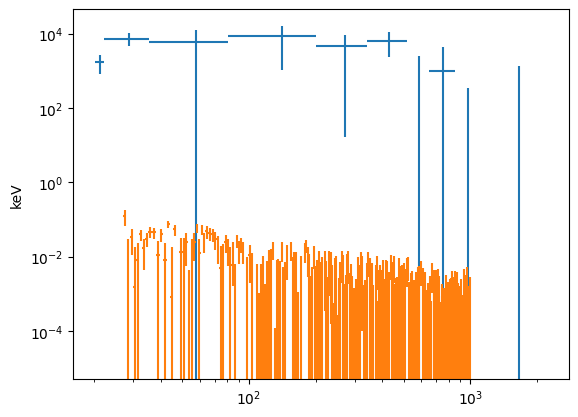

In [36]:
import matplotlib.pylab as plt

plt.figure()

plt.errorbar(
    ce,
    d['RATE'],
    d['STAT_ERR'],
    xerr=de,
    ls=""
)

plt.errorbar(
    (rmf[1].data['E_MAX'] + rmf[1].data['E_MIN'])*0.5,
    spec[1].data['RATE'],
    spec[1].data['STAT_ERR'],
    xerr=(rmf[1].data['E_MAX'] - rmf[1].data['E_MIN'])*0.5,
    ls="",
)

plt.ylabel("counts/s")
plt.ylabel("keV")
plt.loglog()

plt.savefig("spec_afterglow.pdf")

# TODO: add in grey other data

In [37]:
import numpy as np

In [39]:
sn_max = np.max(d['RATE'] / d['STAT_ERR'])
sn = np.max(d['RATE'] / d['STAT_ERR'])
sn_total = np.sum(d['RATE']) / np.sum(d['STAT_ERR']**2)**0.5
# exposure = spec[2].header['EXPOSURE']
ag_spec="spec_afterglow.pdf"